<a href="https://colab.research.google.com/github/Wahiba275/KMEANS_from_scratch/blob/main/K_means_version_finale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataset = pd.read_csv("mallCustomerData.txt")

In [ ]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
x=dataset["Annual Income (k$)"].values
y=dataset["Spending Score (1-100)"].values
z=np.array(list(zip(x,y)))

In [ ]:
x

array([ 15,  15,  16,  16,  17,  17,  18,  18,  19,  19,  19,  19,  20,
        20,  20,  20,  21,  21,  23,  23,  24,  24,  25,  25,  28,  28,
        28,  28,  29,  29,  30,  30,  33,  33,  33,  33,  34,  34,  37,
        37,  38,  38,  39,  39,  39,  39,  40,  40,  40,  40,  42,  42,
        43,  43,  43,  43,  44,  44,  46,  46,  46,  46,  47,  47,  48,
        48,  48,  48,  48,  48,  49,  49,  50,  50,  54,  54,  54,  54,
        54,  54,  54,  54,  54,  54,  54,  54,  57,  57,  58,  58,  59,
        59,  60,  60,  60,  60,  60,  60,  61,  61,  62,  62,  62,  62,
        62,  62,  63,  63,  63,  63,  63,  63,  64,  64,  65,  65,  65,
        65,  67,  67,  67,  67,  69,  69,  70,  70,  71,  71,  71,  71,
        71,  71,  72,  72,  73,  73,  73,  73,  74,  74,  75,  75,  76,
        76,  77,  77,  77,  77,  78,  78,  78,  78,  78,  78,  78,  78,
        78,  78,  78,  78,  79,  79,  81,  81,  85,  85,  86,  86,  87,
        87,  87,  87,  87,  87,  88,  88,  88,  88,  93,  93,  9

In [ ]:
y

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83], dtype=int64)

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

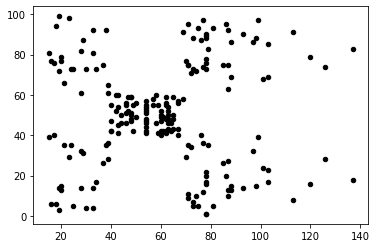

In [ ]:
plt.scatter(x,y,c='black',s=20)

In [ ]:
from typing import List,Tuple

In [ ]:
z=np.array(list(zip(x,y)))

In [ ]:
def kmeans(data: List[List[float]], k: int, max_iter: int) -> List[int]:
  # Initialiser les centres de cluster de manière aléatoire
  centers = data[np.random.choice(len(data), size=k, replace=False)]

  for _ in range(max_iter):
    # Attribuer chaque point de données au cluster correspondant au centre le plus proche
    clusters = []
    for point in data:
        distances = []
        for center in centers:
        # Calculer la distance euclidienne entre le point et le centre
            distance = np.sqrt(np.sum((point - center) ** 2))
            distances.append(distance)
      # Attribuer le point au cluster correspondant au centre le plus proche
        cluster = np.argmin(distances)
        clusters.append(cluster)

    # Calculer la moyenne des points de données attribués à chaque cluster
    new_centers = []
    for i in range(k):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        center = np.mean(points, axis=0)
        new_centers.append(center)

    # Vérifier si les centres de cluster ont changé
    if np.allclose(centers, new_centers):
        break
    else:
        centers = new_centers

  return centers,clusters

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_15684/2539638726.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


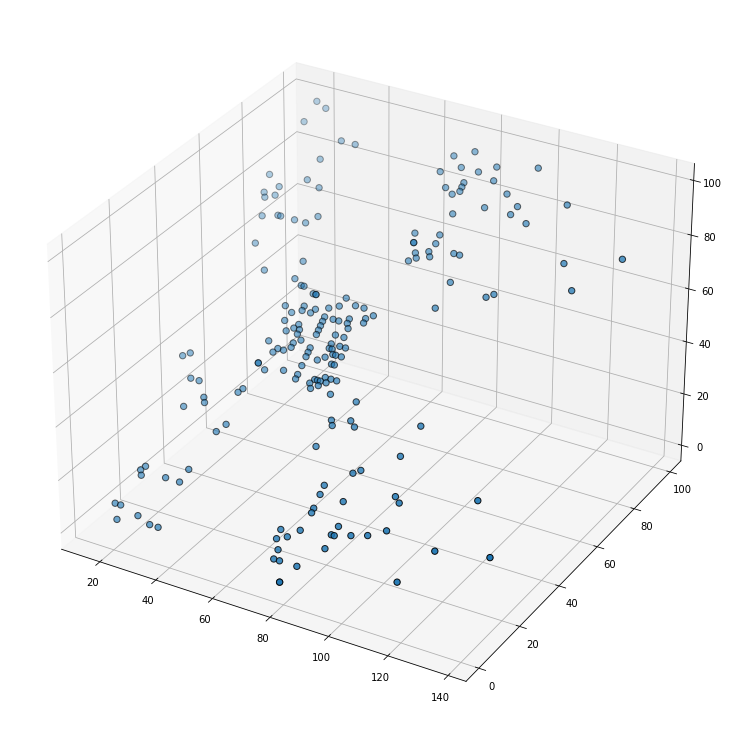

In [ ]:
fig=plt.figure(figsize=(10,10))
ax=Axes3D(fig)
ax.scatter(
    z[:, 0],
    z[:, 1],
    z[:, 1],
    edgecolor="k",
    s=40,
)

In [ ]:
centroide,cluster=kmeans(z,3,25)

In [ ]:
print(centroide)

[array([44.15447154, 49.82926829]), array([87.        , 18.63157895]), array([86.53846154, 82.12820513])]


In [ ]:
print(cluster)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2]


In [ ]:
c1=centroide[0].tolist()
c2=centroide[1].tolist()
c3=centroide[2].tolist()

In [ ]:
c=np.array([c1,c2,c3])

In [ ]:
c

array([[44.15447154, 49.82926829],
       [87.        , 18.63157895],
       [86.53846154, 82.12820513]])

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_15684/1865669341.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


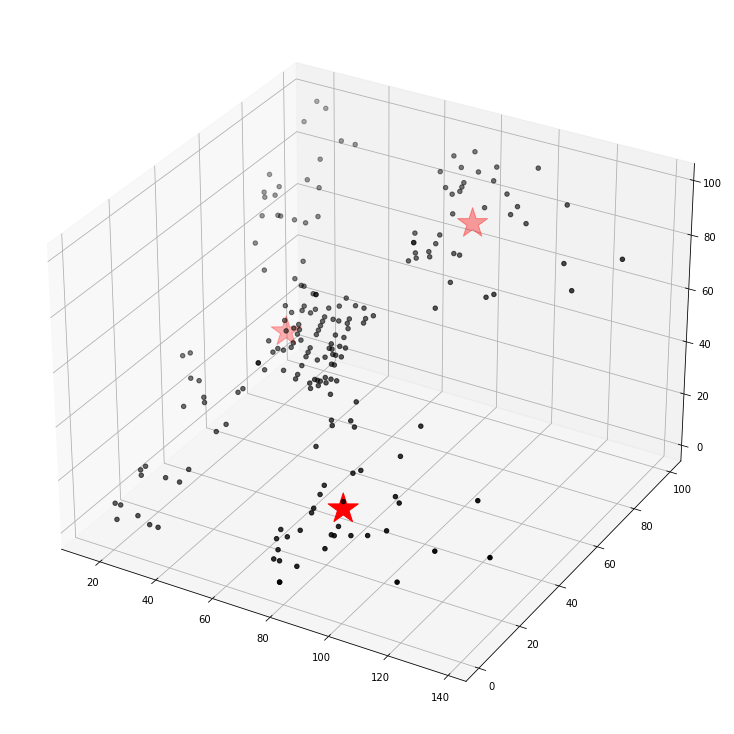

In [ ]:
fig=plt.figure(figsize=(10,10))
ax=Axes3D(fig)
ax.scatter(
    z[:, 0],
    z[:, 1],
    z[:, 1],
    c='k'
)
ax.scatter(
    c[:, 0],
    c[:, 1],
    c[:, 1],
    marker='*',
    c='red',
    s=1000
)